#    TP03: Régression logistique

 La ***régression logistique*** est une autre technique supervisé utilisé en machine learning. C'est la méthode de classification pour les problèmes avec deux classes(0/1).
 
 ## I-Algorithm du Gradient de descent
 
 -***Hypothèses***: $h_\theta(x)= \frac{1}{1+\exp(-\theta^Tx)}$
 
 $h_\theta(x)> 0,5 $  quand la classe (étiquette) vaut $Y=1$.
    
$h_\theta(x) < 0,5$  quand la classe (étiquette) vaut $Y=0$.
 
 ***Paramètres du model***: $\theta$ avec $m$ examples, $n $ variables
 
***Fonction du coût***:$J(\theta)=-\frac{1}{m}\sum_{i=0}^{m} y(i)\log(h_\theta(x(i)))+(1-y(i)) \log(1-h_\theta(x(i))$
 
***Objectif***: Trouver les meilleurs paramètres $\theta$  revient à minimiser  la fonction du coût.
		$	\min_{\theta}J(\theta)$	
		
		
***Algorithme du Gradient de descent***: $ \theta_j=\theta_j-\alpha	\frac{1}{m}\sum_{i=0}^{m} (h_\theta(x(i))-y(i))x_j(i)$


### 1. Recuperation des données
#### ***Q1***
   -utilisez la fonction ***make_blobs(n_samples,centers, cluster_std,random_state)*** du module ***sklearn.datasets*** pour generer deux classes puis visualiser les deux classes comme suivants:
*   rouge: y=0
*   blue: y=1
<img src="log.png" style="with:150px;height:280px"/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

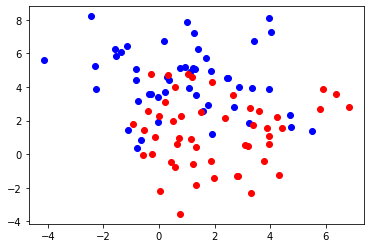

In [2]:
import sklearn.datasets as sd
import numpy as np
import matplotlib.pyplot as plt
#np.random.seed(0)
x,y = sd.make_blobs(n_samples=100,centers=2,cluster_std=2,random_state=0)
colors = ['b','r']
for i,col in enumerate(colors):
    a=i==y
    plt.scatter(x[a,0],x[a,1], c=col)

#### ***Q2***   
          -a)Corriger les dimentions avec np.reshape
      
          -b)Créez la matrice X
          
          -c) Créez le vecteur $\_theta$ (initialisé avec des coefficients nuls)

In [5]:
y = np.reshape(y,(100,1))
X = np.hstack((x, np.ones((100,1))))
theta = np.random.random((X.shape[1],1))

print("X:", X.shape)
print("y:", y.shape)
print("theta:", theta.shape)
theta

X: (100, 3)
y: (100, 1)
theta: (3, 1)


array([[0.49081095],
       [0.04748704],
       [0.99381033]])

### 2. Implémentation du modèle et évaluation
 ####  ***Q1***
 
       

 a) Implémenter la ***fonction sigmoid*** $h_\theta(x)= \frac{1}{1+\exp(-X\theta)}$
 
 b) Ecrire la ***Fonction du coût***:$J(\theta)=-\frac{1}{m}\sum_{i=0}^{m} y(i)\log(h_\theta(x(i)))+(1-y(i)) \log(1-h_\theta(x(i))$
 
 c) Ecrire un script qui définit la fonction du gradiant $$ \frac{\delta J(\theta)}{\delta \theta}=\frac{1}{m}X^T.(X.\theta-y)$$
 
 d) Implementer la descente de gradient en utilisant de gradiant:
$$ \theta\leftarrow \theta- \alpha\frac{\delta J(\theta)}{\delta \theta}$$
 
 e) Trouver les valeurs de $\theta$ pour un learning rate $\alpha=0.1$ et un nombre d'itérations de $150$

In [5]:
def sigmoid(x,theta):
    Z = x.dot(theta)
    return 1 / (1+np.exp(-Z))

def cost(x,y,theta):
    m = -1/len(x)
    h = sigmoid(x,theta)
    return m*np.sum(y*np.log(h) + (1-y)*np.log(1-h))

def gradient(x,y,theta):
    m = 1/len(x)
    return m*x.T.dot(X@theta -y)

def gradient_descent(x,y,theta, l_rate=0.1, n_iter=100):
    hist = []
    for i in range(n_iter):
        theta -= l_rate*gradient(x,y,theta)
        hist.append(cost(x,y,theta))
    
    return theta, hist

In [6]:
l_rate, n_iter = 0.01, 500
theta, cost_hist = gradient_descent(X,y,theta, l_rate, n_iter)
theta

array([[ 0.14879904],
       [-0.1556525 ],
       [ 0.66305502]])

 ####  ***Q2***
 
 a) Evaluer le modèle en calculant le coefficient de determination
 
 b) Tracer la courbe d'apprantissage

In [7]:
def determination_coef(y,pred):
    u  = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - (u/v)

def predections(A):
    A = A>=0.5
    return np.array(A, dtype='int')

In [8]:
pred = sigmoid(X,theta)
pred = predections(pred)
determination_coef(y, pred)

-0.48

In [9]:
 from sklearn.metrics import accuracy_score

In [10]:
accuracy_score(y,pred)

0.63

<AxesSubplot:title={'center':"courbe d'apprentissage"}>

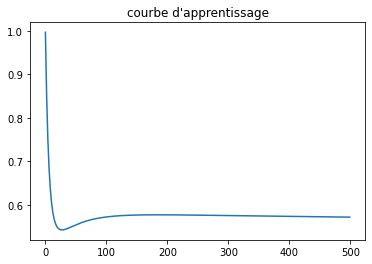

In [11]:
plt.title("courbe d'apprentissage")
sns.lineplot(y=cost_hist, x=range(n_iter))

### 3. Prédiction

A quelle classe apartient les deux points suivants: x1=(1,5); x2(3,1) 

In [12]:
x1 = np.array([1,5,1])
x2 = np.array([3,1,1])

A1 = sigmoid(x1,theta)
A2 = sigmoid(x2,theta)

print("x1 de classe",predections(A1)[0])
print("x2 de classe",predections(A2)[0])

x1 de classe 1
x2 de classe 1


## II- Utilisation des modules python
### 1. Récuperation des données
Les données sont stocker dans le fichier banking.csv. Ce dataset contient des information collecter par un centre d'appel pour savoir si un client souscrira (1/0) à un dépôt à terme (variable y) dans une baque.

1-Recuperer les données de ce fichier dans un DataFrame data

2-Afficher les 10 premiere ligne de ce dataframe

3-Afficher le nombre de client par class (1/0)

In [13]:
data = pd.read_csv('banking.csv', sep=',')
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,basic.4y,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,...,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,blue-collar,single,basic.4y,no,yes,no,cellular,apr,thu,...,2,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0


In [14]:
data.groupby('y').count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,,,,,,,,,,,
0,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548
1,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640


### 2- Entrainement et test du modèle
Dans un premier lieux, nous allons utiliser comme critères de classifiction suivants:
"age": l'age du client
"emp_var_rate": employment variation rate
"cons_conf_idx": consumer confidence index

1- Creer deux numpy array X et y

X: les trois colonne "age","emp_var_rate" et "cons_conf_idx"

y: "y"

2- Nous allons utiliser **80%** du dataSet pour l'entrainement et **20%** pour le teste du modèle. utiliser la méthode **train_test_split()** du module **sklearn.model_selection** pour créer ces deux sous ensembles (X_train,X_test,y_train,y_test).

3- Creer un objet **LogisticRegression** du module **sklearn.linear_model** et utiliser **(X_train,y_train)** pour entrainer le model à l'aide la méthode **fit()** du même objet.

4- Utiliser la méthode **predict(X_test)** pour predire les classe des élément de X_test : y_pred

5- Les performences du modele sont alors mesurer à l'aide 4 metriques:
**TP: Nombre de True positives y_test==y_pred==1**

**TN: Nombre de True negatives y_test==y_pred==0**

**FP: Nombre de False positives y_test!=y_pred==1**

**FN: Nombre de False negatives y_test!=y_pred==0**


**$$Accuracy = (TP+TN)/(TP+TN+FP+FN) $$**

Calculer la precision de ce modèle?

6- Ces 4 metriques forment ce qu'on appel une **Confusion Matrix** disponible comme méthode dans le module **sklearn.metrics** :  **Confusion Matrix(y_test, y_pred)**

Recalculer precision de ce modèle on utilisant cette matrice de confusion

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [25]:
X = data[["age","emp_var_rate","cons_conf_idx"]]
y = data['y']
print(y.shape)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

(41188,)


In [23]:
y_test == y_pred

28234     True
1135      True
34346     True
573       True
40949     True
         ...  
7536      True
34777     True
3201      True
1084     False
23704     True
Name: y, Length: 8238, dtype: bool

In [17]:
def accurancy(y_test, y_pred):
    T = y_pred == y_test
    F = y_pred != y_test
    TP, TN = np.sum(T==1), np.sum(T==0)
    FP, FN = np.sum(F==1), np.sum(F==0)
    return (TP + TN) / (TP+TN+FP+FN)

print('accurancy =',accurancy(y_test, y_pred))

accurancy = 0.5


[[7277   79]
 [ 824   58]]


<AxesSubplot:>

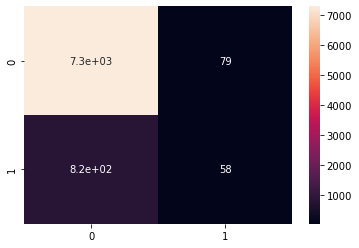

In [18]:
acc = confusion_matrix(y_test, y_pred)
print(acc)
sns.heatmap(acc, annot=True)

In [28]:
accurancy = (acc[0,0]+acc[1,1])  / np.sum(acc)
print('accurancy =', accurancy)

accurancy = 0.8903860160233066


### 3- prediction
Voici des information de trois clients:

client1:  {"age": 55, "emp_var_rate": -2.9, "cons_conf_idx": 31.4}

client2:  {"age": 45, "emp_var_rate": 3.7,"cons_conf_idx": 4}

client3:  {"age": 39, "emp_var_rate": 3.3,"cons_conf_idx": 6}

1- Créer un DataFrame à partir de ce données

2- Lequel de ces client souscrira à un dépôt à terme

In [20]:
client1 = {"age": 55, "emp_var_rate": -2.9, "cons_conf_idx": 31.4}

client2 = {"age": 45, "emp_var_rate": 3.7,"cons_conf_idx": 4}

client3 = {"age": 39, "emp_var_rate": 3.3,"cons_conf_idx": 6}

df = pd.DataFrame([client1,client2,client3])
df

,age,emp_var_rate,cons_conf_idx
0,55,-2.9,31.4
1,45,3.7,4.0
2,39,3.3,6.0


In [21]:
pred = logistic_model.predict(df)
print('- predictions:', pred)

for i in pred:
    if i==1:
        print(f"- le client {i} peut souscrira a un depot a terme.")

- predictions: [1 0 0]
- le client 1 peut souscrira a un depot a terme.


# 